## Data Exploration

In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Finding Outliers

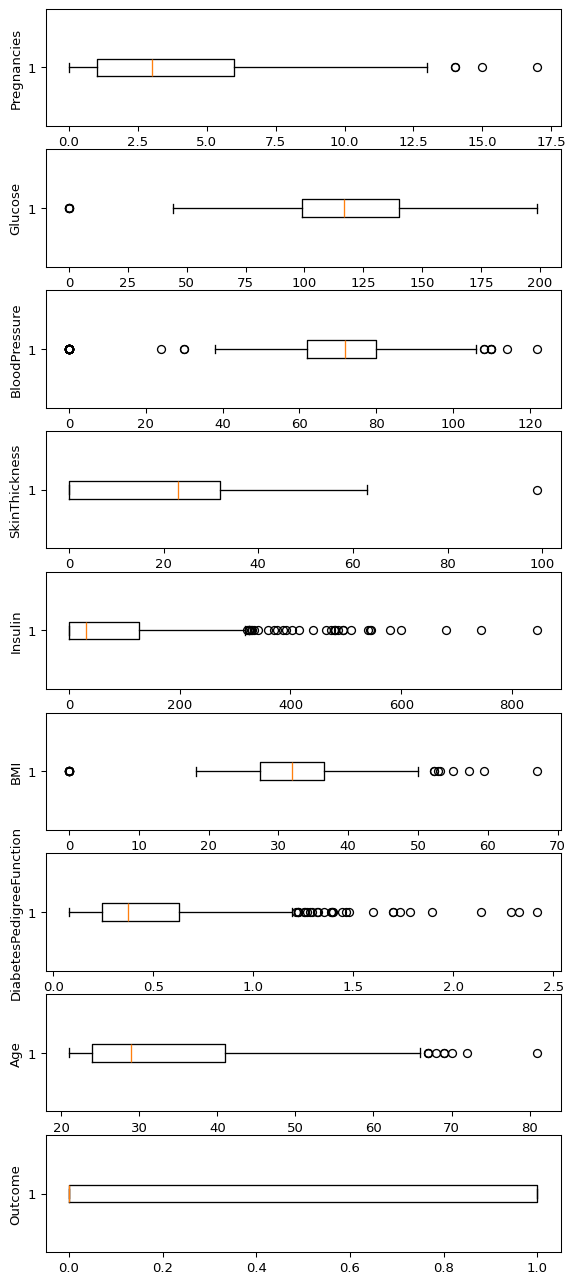

In [6]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in diabetes_data.columns:
    axs[i].boxplot(diabetes_data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

## Removing Outliers

### Removing Outliers for Insulin

In [7]:
# Identify the quartiles
q1, q3 = np.percentile(diabetes_data['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
iqr

np.float64(127.25)

In [8]:
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

-190.875 318.125


In [9]:
# Drop the outliers
clean_data = diabetes_data[(diabetes_data['Insulin'] >= lower_bound) 
                & (diabetes_data['Insulin'] <= upper_bound)]

### Removing Outliers for Pregnancies

In [10]:
# Identify the quartiles
q1, q3 = np.percentile(diabetes_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
iqr

np.float64(5.0)

In [11]:
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

-6.5 13.5


In [12]:
# Drop the outliers
clean_data = diabetes_data[(diabetes_data['Pregnancies'] >= lower_bound) 
                & (diabetes_data['Pregnancies'] <= upper_bound)]

### Removing Outliers for Age

In [13]:
# Identify the quartiles
q1, q3 = np.percentile(diabetes_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
iqr

np.float64(17.0)

In [14]:
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

-1.5 66.5


In [15]:
# Drop the outliers
clean_data = diabetes_data[(diabetes_data['Age'] >= lower_bound) 
                & (diabetes_data['Age'] <= upper_bound)]

### Removing Outliers for Glucose

In [16]:
# Identify the quartiles
q1, q3 = np.percentile(diabetes_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
iqr

np.float64(41.25)

In [17]:
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

37.125 202.125


In [18]:
# Drop the outliers
clean_data = diabetes_data[(diabetes_data['Glucose'] >= lower_bound) 
                & (diabetes_data['Glucose'] <= upper_bound)]

### Removing Outliers for BloodPresure

In [19]:
# Identify the quartiles
q1, q3 = np.percentile(diabetes_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
iqr

np.float64(18.0)

In [20]:
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

35.0 107.0


In [21]:
# Drop the outliers
clean_data = diabetes_data[(diabetes_data['BloodPressure'] >= lower_bound) 
                & (diabetes_data['BloodPressure'] <= upper_bound)]

### Removing Outliers for BMI

In [22]:
# Identify the quartiles
q1, q3 = np.percentile(diabetes_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
iqr

np.float64(9.3)

In [23]:
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

13.35 50.550000000000004


In [24]:
# Drop the outliers
clean_data = diabetes_data[(diabetes_data['BMI'] >= lower_bound) 
                & (diabetes_data['BMI'] <= upper_bound)]

### Removing Outliers for DiabetesPedigreeFunction

In [25]:
# Identify the quartiles
q1, q3 = np.percentile(diabetes_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
iqr

np.float64(0.38249999999999995)

In [26]:
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

-0.32999999999999996 1.2


In [27]:
# Drop the outliers
clean_data = diabetes_data[(diabetes_data['DiabetesPedigreeFunction'] >= lower_bound) 
                & (diabetes_data['DiabetesPedigreeFunction'] <= upper_bound)]

## Correlation

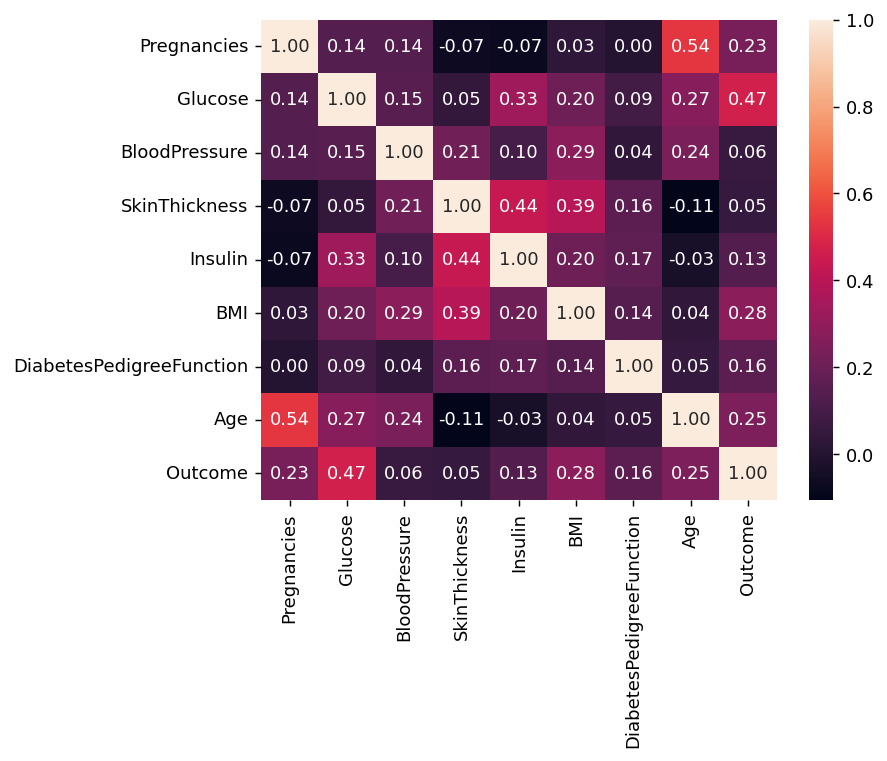

In [35]:
corr = clean_data.corr()
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [36]:
corr["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.471070
BMI                         0.283352
Age                         0.247950
Pregnancies                 0.234958
DiabetesPedigreeFunction    0.160618
Insulin                     0.133768
BloodPressure               0.059433
SkinThickness               0.052800
Name: Outcome, dtype: float64